## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
## Making column for only zip codes, splicing the address column 
zips = pd.DataFrame([int(x[-20:-15]) for x in df['address']])
df['zipcode'] = zips


#using zip codes that have at least 100 homes in them from the dataset
goodzips = []
for key, value in df['zipcode'].value_counts().items():
    if value > 100:
        goodzips.append(key)
    else:
        continue
len(goodzips)
df = df[df['zipcode'].isin(goodzips) == True]

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,...,1050,420,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.37062,98117
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122


In [7]:
## Adding price per square foot column

df['price_per_sqft'] = round((df['price'] / df['sqft_living']), 2)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,price_per_sqft
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,572.03
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,332.13
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,107.99
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,358.80
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,529.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,...,420,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.37062,98117,566.14
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,814.14
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,650.00
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,493.83


In [8]:
## Replaces YES and NO in the columsn waterfront, greenbelt, and nuisance with numeric values
for x in df[['waterfront', 'greenbelt', 'nuisance']]:
    df[x] = df[x].replace("NO", 0).replace("YES", 1)
    
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,price_per_sqft
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,572.03
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,332.13
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,107.99
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,358.80
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,529.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,0,0,...,420,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.37062,98117,566.14
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0,0,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,814.14
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0,0,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,650.00
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0,0,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,493.83


In [9]:
df['view'].value_counts()

NONE         25373
AVERAGE       1882
GOOD           858
EXCELLENT      539
FAIR           214
Name: view, dtype: int64

In [10]:
df['date'] = [x[-4:] for x in df['date']]
df['date'].value_counts()

2021    18426
2022    10440
Name: date, dtype: int64

In [11]:
df.drop(['address', 'lat', 'long'], axis=1, inplace=True)

In [12]:
import numpy as np

##getting the upper and lower bounds for sale price
# got iqr and multiplied by 1.5

iqrprice = np.percentile(df['price'], 75) -np.percentile(df['price'], 25)
lower_lim_price =np.percentile(df['price'], 25) - 1.5*iqrprice
upper_lim_price =np.percentile(df['price'], 75) + 1.5*iqrprice
print(f'anything above {upper_lim_price} and below {lower_lim_price} is an outlier')
df = df[df['price'] <= upper_lim_price]

anything above 2300000.0 and below -340000.0 is an outlier


<AxesSubplot:xlabel='price', ylabel='Count'>

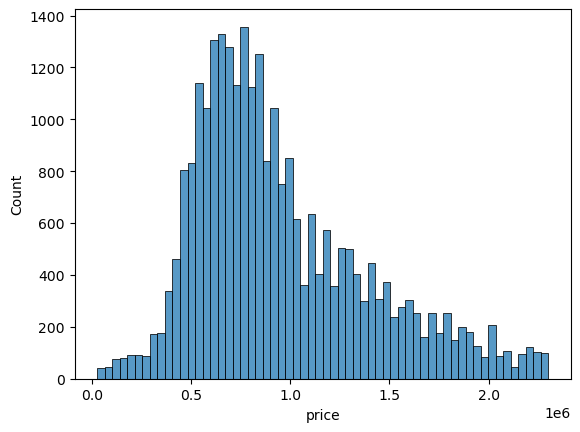

In [13]:
import seaborn as sns

sns.histplot(df['price'])

In [14]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,zipcode,price_per_sqft
id,1.000000,0.000630,0.006008,0.010231,0.000265,-0.120072,0.047825,-0.030808,0.054856,-0.053480,0.009621,-0.015318,0.007663,-0.034841,0.032533,-0.028620,-0.004979,-0.007017
price,0.000630,1.000000,0.314515,0.437840,0.565839,0.075684,0.220593,0.033420,0.108630,-0.016546,0.479078,0.202646,0.234247,0.248959,0.089021,0.055385,-0.052695,0.041189
bedrooms,0.006008,0.314515,1.000000,0.565151,0.639371,-0.008086,0.165705,-0.062782,0.057843,-0.047444,0.520211,0.214010,0.282697,0.148447,0.164205,-0.003544,-0.151904,-0.015981
bathrooms,0.010231,0.437840,0.565151,1.000000,0.733824,0.021401,0.415918,-0.016854,0.091285,-0.064421,0.610995,0.208204,0.427901,0.269751,0.468070,0.022979,-0.168073,-0.002735
sqft_living,0.000265,0.565839,0.639371,0.733824,1.000000,0.105903,0.340638,0.005894,0.114569,-0.076396,0.853244,0.272551,0.471352,0.341891,0.336212,0.011343,-0.188676,-0.036419
sqft_lot,-0.120072,0.075684,-0.008086,0.021401,0.105903,1.000000,-0.032194,0.089795,-0.017069,0.014432,0.116045,-0.006279,0.072076,0.155586,0.003957,0.013806,-0.104727,0.035566
floors,0.047825,0.220593,0.165705,0.415918,0.340638,-0.032194,1.000000,-0.018665,0.075550,-0.037891,0.509366,-0.284066,0.157703,0.103547,0.533967,-0.022779,-0.029826,-0.000889
waterfront,-0.030808,0.033420,-0.062782,-0.016854,0.005894,0.089795,-0.018665,1.000000,-0.017485,-0.001029,-0.000342,-0.000892,-0.050155,0.095136,-0.045685,0.080789,-0.039585,0.003156
greenbelt,0.054856,0.108630,0.057843,0.091285,0.114569,-0.017069,0.075550,-0.017485,1.000000,-0.051873,0.134949,-0.041734,0.122055,0.039359,0.119434,-0.028840,-0.105219,-0.001356
nuisance,-0.053480,-0.016546,-0.047444,-0.064421,-0.076396,0.014432,-0.037891,-0.001029,-0.051873,1.000000,-0.113922,0.079452,-0.162555,-0.024837,-0.152478,0.046093,0.119767,0.001107


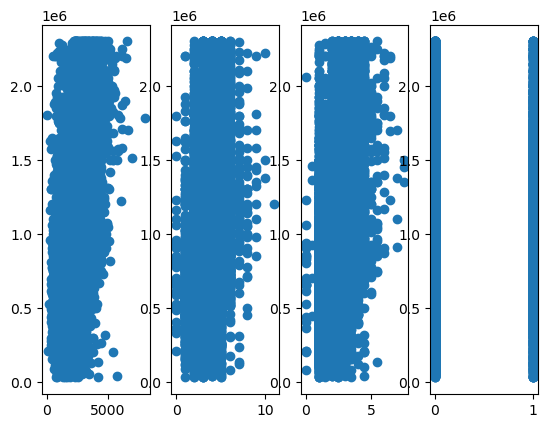

In [15]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, 4)

y = df['price']


ax[0].scatter(df['sqft_living'], y)
ax[1].scatter(df['bedrooms'], y)
ax[2].scatter(df['bathrooms'], y)
ax[3].scatter(df['nuisance'], y)

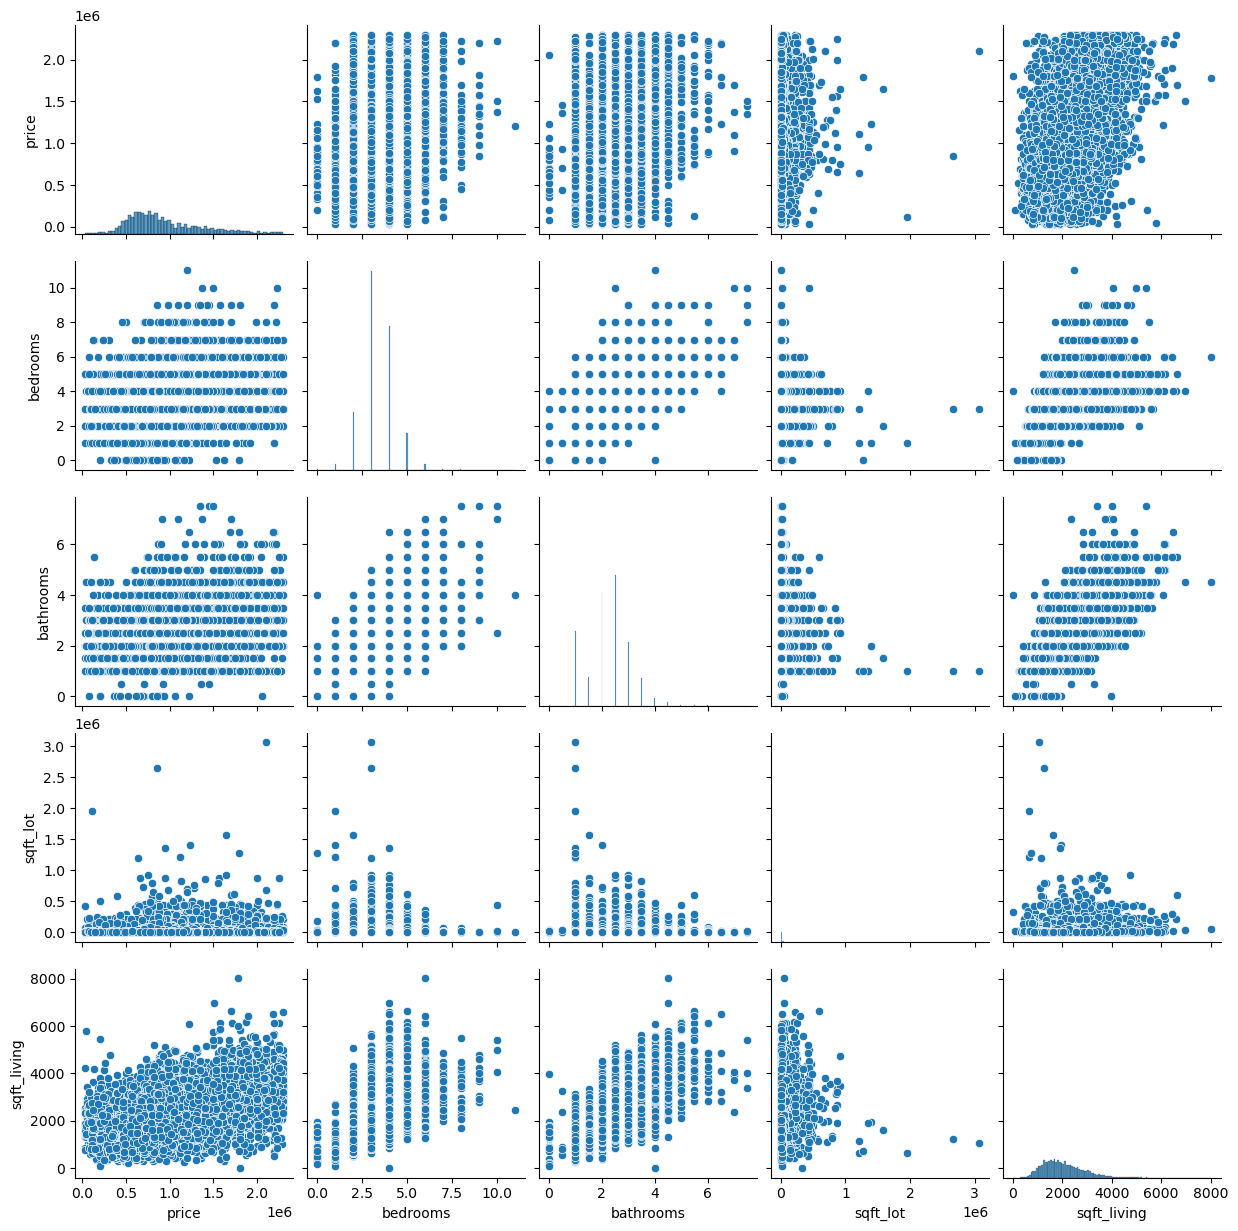

In [16]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living']])

/Users/RachaelMcCue/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

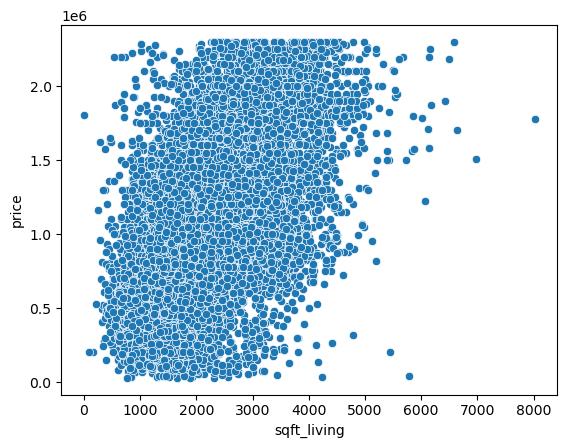

In [17]:
sns.scatterplot(df['sqft_living'], y)

In [19]:
df['sqft_lot'].sort_values()

16934        402
12400        420
3070         435
2410         474
22211        474
          ...   
7306     1400855
10916    1576001
18946    1951712
12180    2657160
13667    3067495
Name: sqft_lot, Length: 27041, dtype: int64